<h1>Project #2: You and Data Science</h1>

<h1>Dataset</h1>

For this project, I’m using the "Star Classification" dataset, which includes various physical properties of stars, including temperature, luminosity, and radius, and their corresponding star class types. As an astrophysics and data science major, this dataset and project combines my two passions to apply data science techinques to a topic that I am passionate about. 

I acquired this dataset through Kaggle (https://www.kaggle.com/datasets/deepu1109/star-dataset) and given its clear and thorough classfication, decided to use it to explore star patterns and the similarities and differences between their classification types and physical properties. Using this data, I want to be able to analyze stellar classification and improve our understanding of stars. 

The dataset classifies stars into six categories, represented through the numbers:
- 0 = Brown Dwarf  

- 1 = Red Dwarf  

- 2 = White Dwarf  

- 3 = Main Sequence  

- 4 = Supergiant  

- 5 = Hypergiant

Some important things to note about stars are their properties. In simple terms, these include:
- Luminosity:
How much energy or light a star gives off.

- Temperature:
How hot the surface of the star is.

- Absolute Magnitude:
How bright the star actually is, no matter how far away it is.

- Radius:
How big the star is from its center to its surface.

- Star Color:
The color of the star, which tells us how hot it is.

- Spectral Class:
A letter used to group stars by their temperature and color.



First, let's load the dataset into a pandas DataFrame and take a look at its basic structure.

In [112]:
import pandas as pd

df = pd.read_csv('6 class csv.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


Next, we need to look at the basic information about this dataset.

In [113]:
print('Number of rows and columns:', df.shape)
print('\nColumn names:', df.columns.tolist())
print('\nDataset info:')
df.info()

Number of rows and columns: (240, 7)

Column names: ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


<h1>Exploratory Data Analysis</h1>

To understand the structure of the Star Classification dataset, I did exploratory data analysis (EDA) using descriptive statistics.

I focused on:

- Measures of Center: Mean and median values of columns to visualize the average tendencies of star properties.

- Measures of Spread: Standard deviation shows us how much variation exists in properties across different types of stars.

- Class Distribution: Seeing how many stars fall into each class to know if the dataset is well-rounded.

- Missing Values: Making sure the dataset is complete and ready for analysis.

With these insights, we can successfully identify trends at first glance and see what properties and aspects of the dataset we need to analyzer deeper.



In [114]:
print('Number of rows:', len(df))
print('\nNumber of columns:', len(df.columns))
print('\nSummary of statistics:')
df.describe()

Number of rows: 240

Number of columns: 7

Summary of statistics:


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [115]:
df_mean = df.groupby('Star type')[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].agg('mean')
print('\nMean grouped by star type:')
df_mean


Mean grouped by star type:


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
Star type,,,,
0,2997.950,0.000693,0.110015,17.563500
1,3283.825,0.005406,0.348145,12.539975
2,13931.450,0.002434,0.010728,12.582500
3,16018.000,32067.386275,4.430300,-0.367425
4,15347.850,301816.250000,51.150000,-6.369925
5,11405.700,309246.525000,1366.897500,-9.654250


In [116]:
df_std = df.groupby('Star type')[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].agg('std')
print('\nSTD grouped by star type:')
df_std


STD grouped by star type:


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
Star type,,,,
0,332.276295,0.000888,0.025783,1.213111
1,269.637258,0.007330,0.154453,1.422816
2,4957.655189,0.008912,0.001725,1.278386
3,10661.234972,69351.195858,2.801390,3.613592
4,10086.784628,175756.378119,27.656826,0.560051
5,11816.991886,199343.999427,255.561357,1.453605


In [117]:
print('\nStar class distribution:')
print(df.groupby('Star type').size())


Star class distribution:
Star type
0    40
1    40
2    40
3    40
4    40
5    40
dtype: int64


In [118]:
print('\nMissing values in each column:')
print(df.isnull().sum())


Missing values in each column:
Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64


Based on the EDA:

- The dataset has 240 rows and 7 columns, giving it 1680 data points.

- There are no missing values, which is ideal for analysis.

- Thes star type distribution is fairly balanced, with the same number of samples in each of the six classes (0 to 5).

- The temperature range is from from a few thousand to over 40,000 K, which shows the diversity in stellar types.

- Standard deviations are bigger for some aspects, which means that since there is no conclusive trend, we can analyze it more.

These observations help us understand the dataset's structure a lot more and show what trends we should explore next. 

<h1>Exploratory Data Visualization</h1>

To better visualize the data, it helps to make a graph or plot that can summarize the trends we looked at previously. 

In order to make sure our graphs are not too cluttered, we can group our dataset to plot.

<Axes: title={'center': 'Number of Stars by Type'}, xlabel='Star Type', ylabel='Count'>

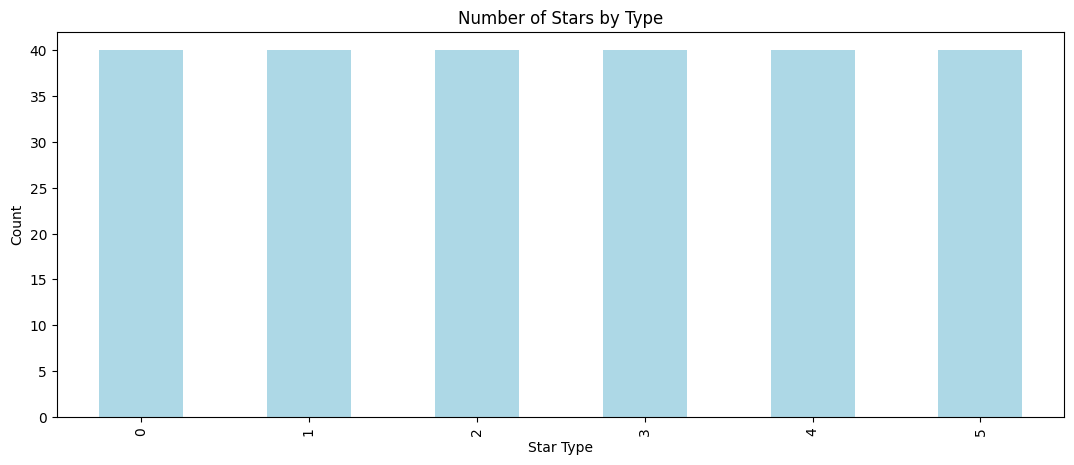

In [119]:
import matplotlib.pyplot as plt

df_sample = df.groupby('Star type').size()
df_sample.plot.bar(df_sample.index, df_sample.values, figsize=(13,5), color='lightblue', title='Number of Stars by Type', 
                   xlabel='Star Type', ylabel='Count')

<Axes: title={'center': 'Radius vs Luminosity'}, xlabel='Radius', ylabel='Luminosity'>

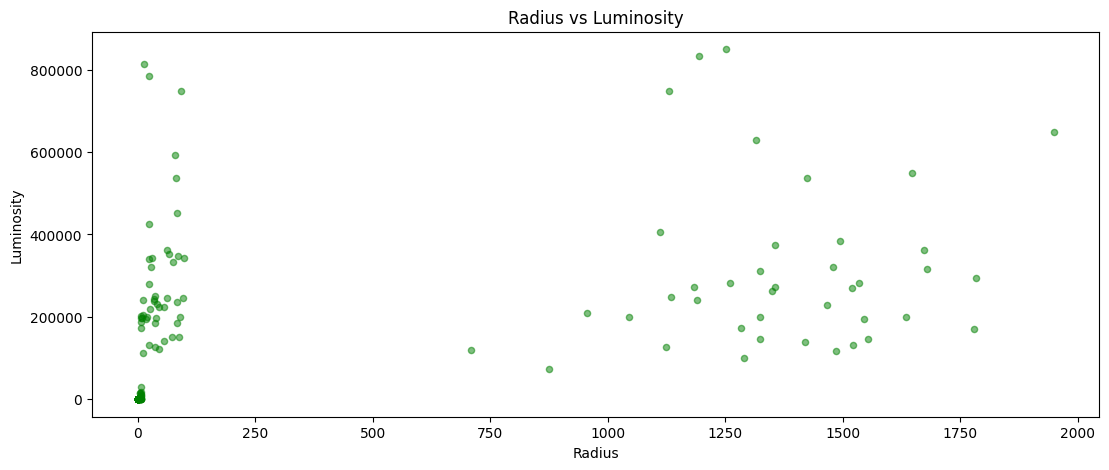

In [120]:
df.plot.scatter(y='Luminosity(L/Lo)', x='Radius(R/Ro)', color='green', alpha=0.5, figsize=(13,5), 
                title='Radius vs Luminosity', xlabel='Radius', ylabel='Luminosity')

<Axes: title={'center': 'Star Type Distribution by Spectral Class'}, xlabel='Spectral Class', ylabel='Count'>

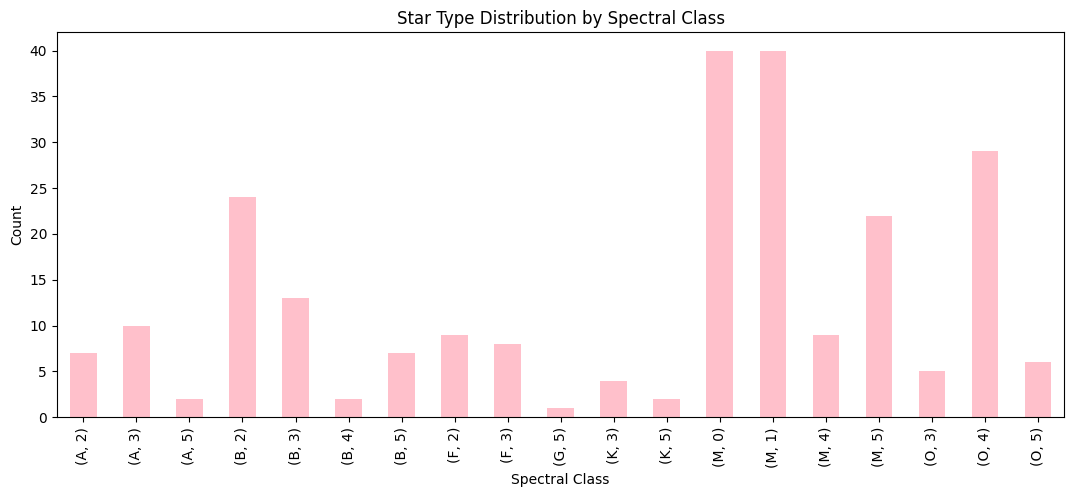

In [121]:
df_sample2 = df.groupby(['Spectral Class', 'Star type']).size()
df_sample2.plot.bar(stacked=True, figsize=(13, 5), color='pink', title='Star Type Distribution by Spectral Class', 
                    xlabel='Spectral Class', ylabel='Count')

To better understand the dataset, I created a few graphs to reveal trends and relationships between key features:

- Bar Chart of Star Classification Counts: This graph displays how many stars fall under each star type (e.g., Main Sequence, White Dwarf, Hypergiant, etc.). I found that there are the same number of stars of each star type in this dataset.

- Scatter Plot of Radius vs. Luminosity: This plot shows the relationship between a star’s radius and its luminosity. It showed that for most of the smaller radii, the luminosity can vary severely, but larger stars tend to have less distributed luminosities.

- Bar Chart of Star Type Distribution by Spectral Class: This grouped bar chart shows how different spectral classes (O, B, A, F, G, K, M) relate to the star classification types. It showed that some spectral classes are more likely to be associated with certain star types. 

These visualizations illustrated a broad overview of how stars relate and differ by properties like type, absolute magnitude, luminosity, and spectral class.



<h1>Planning for Part II</h1>

Throughout my exploratory data analysis, I noticed several fascinating patterns in the dataset:

Star types are not evenly distributed by stellar classes. Some types, like Brown Dwarfs and Red Dwarfs, appear only in stellar class M. I also found that there's a not a strong correlation between radius and luminosity for certain types of stars, but that can be explored more in regards to other properties as well. Moreover, spectral class plays a significant role in determining star classification as cooler spectral classes tend to associate more with dwarfs, while hotter ones are associated with giants.

For Part II, I’m planning to dive deeper into the connections between physical properties and star classification. Some of the specific questions I’d like to explore are:

- Can I build a simple classification model to predict a star's type based on physical features like temperature, radius, luminosity, absolute magnitude, and spectral class?

- Which features (temperature, luminosity, radius, etc.) are most important and have a clear trend in determining star type?

- Are there any groupings in the data that could suggest hidden structure or patterns?

My goal is to use Data Science tools to better understand the underlying trends in stellar data. This project gives me a way to apply data science techniques to real astrophysics, which is exactly the techonological and scientific intersection I’m passionate about.



<h1>Data Science</h>

I am going to focus on answering the question: "Can I build a simple classification model to predict a star's type based on physical features like temperature, radius, luminosity, absolute magnitude, and spectral class?" I will be doing this by using the Random Forest classifier model to find what features/properties of the stars can be best used to classify them.

First, I will be using LabelEncoder to convert the Spectral Class strings into numbers so that it is easier for the machine learning model to use. Then I will train the model to work with the data and test it out to see how our predictions improve, hopefully creating a model that is able to accurately classify stars given any data in the future.


In [122]:
import sklearn
from sklearn.preprocessing import LabelEncoder

spec = LabelEncoder()
color = LabelEncoder()
df['Spectral Class'] = spec.fit_transform(df['Spectral Class'])
df['Star color'] = color.fit_transform(df['Star color'])
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,6
236,30839,834042.000000,1194.0000,-10.63,5,0,6
237,8829,537493.000000,1423.0000,-10.73,5,11,0
238,9235,404940.000000,1112.0000,-11.23,5,11,0


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']]
y = df['Star type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=100)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

df_pred = x_test.reset_index(drop=True)
df_pred['Actual type'] = y_test.reset_index(drop=True)
df_pred['Predicted type'] = y_pred
df_pred

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Actual type,Predicted type
0,5936,1.35700,1.1060,4.460,17,2,3,3
1,2935,0.00014,0.1160,18.890,10,5,0,0
2,3490,270000.00000,1520.0000,-9.400,10,5,5,5
3,21904,748490.00000,1130.0000,-7.670,6,1,5,5
4,10930,783930.00000,25.0000,-6.224,0,6,4,4
...,...,...,...,...,...,...,...,...
67,3295,0.00098,0.1320,17.130,10,5,0,0
68,29560,188000.00000,6.0200,-4.010,6,1,3,3
69,3462,0.00530,0.1480,11.470,10,5,1,1
70,17920,0.00111,0.0106,11.660,0,1,2,2


In [126]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification)

fi = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
print("Feature Importances:\n", fi)

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        12
           3       1.00      0.92      0.96        12
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        12

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

Feature Importances:
 Radius(R/Ro)              0.313609
Absolute magnitude(Mv)    0.294379
Luminosity(L/Lo)          0.168699
Temperature (K)           0.104857
Spectral Class            0.095231
Star color                0.023224
dtype: float64


<h1>A Different Data Visualization</h1>

Given the analysis of the data through the machine learning model, we can see that Radius and Absolute Magnitude are the biggest contributers in determining star type. Using this, we can create a boxplot graph to visualize how Radius is distributed compared to the Star Type.

Text(0, 0.5, 'Radius(R/Ro)')

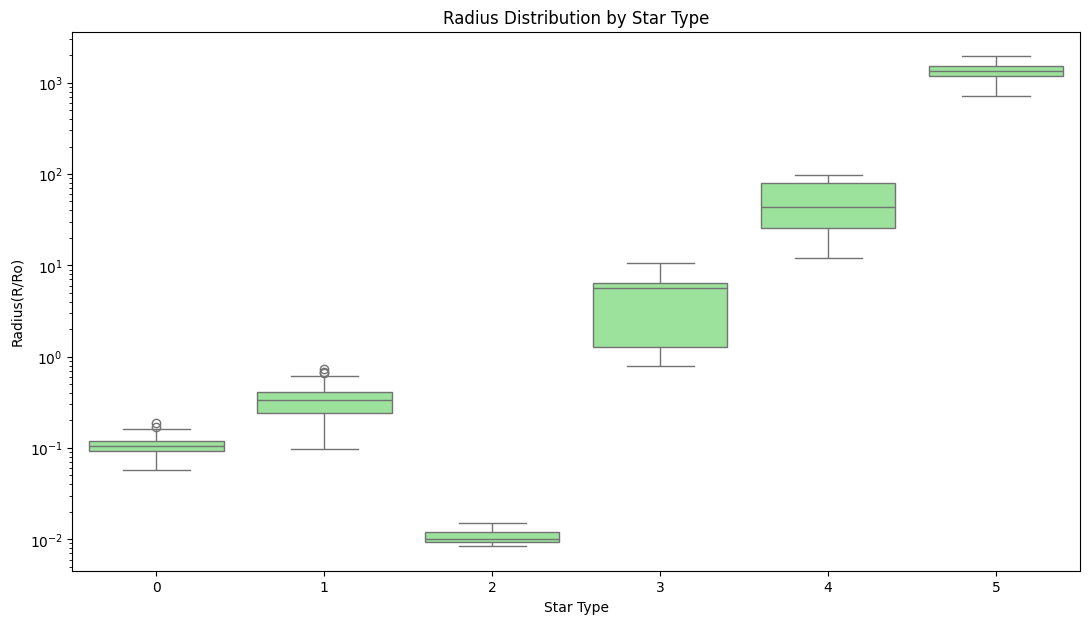

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,7))
sns.boxplot(data = df, x='Star type', y='Radius(R/Ro)', color='lightgreen')

plt.yscale('log')                
plt.title('Radius Distribution by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Radius(R/Ro)')

Text(0, 0.5, 'Absolute magnitude(Mv)')

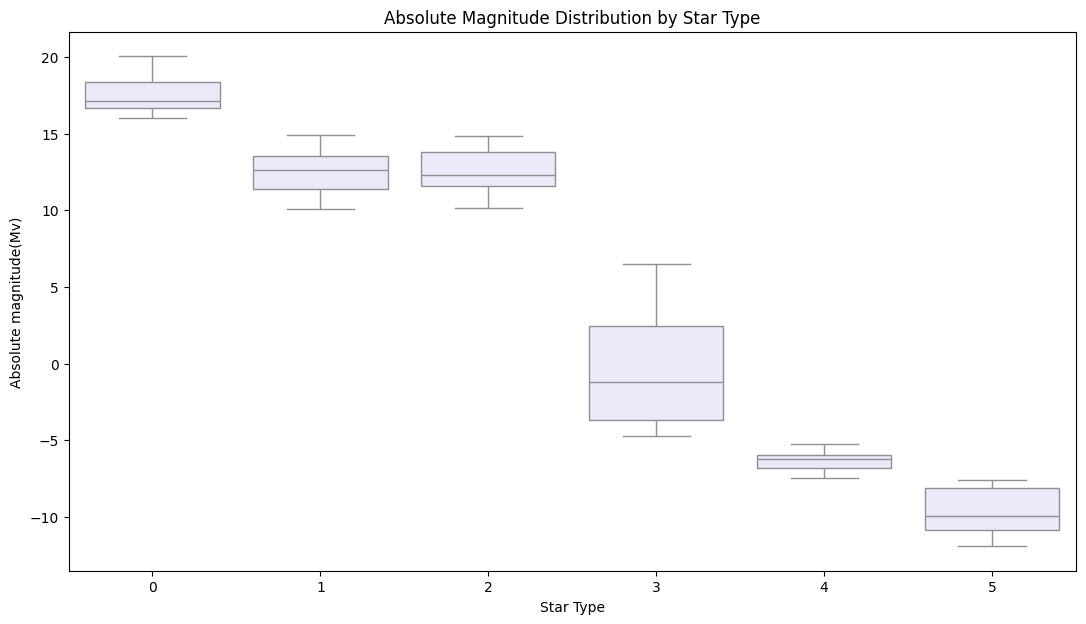

In [134]:
plt.figure(figsize=(13,7))
sns.boxplot(data = df, x='Star type', y='Absolute magnitude(Mv)', color='lavender')

plt.title('Absolute Magnitude Distribution by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Absolute magnitude(Mv)')

In [131]:
inacc = df_pred[df_pred['Actual type'] != df_pred['Predicted type']]
inacc

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Actual type,Predicted type
24,4077,0.085,0.795,6.228,18,4,3,1


What these graphs show:

We can see here that there was only 1 inaccurate prediction in the sample tested, and it was between a Star Type 3 (Main-Sequence ) and Star Type 1 (Red Dwarf). As seen in the graph, there is a small overlap between the two in terms of Radius, which can explain the small inaccuracy of the model. In this case, we can use a different parameter, such as Absolute Magnitude to confirm the classification. Still, given that there is only 1 misprediction, using Radius and Absolute Magnitude as a larger factors of classifying stars seems to be effective.

Additionally, for the Radius graph, using a log‐scaled y-axis allows us see all six types side by side, despite  their typical radii spanning over five orders of magnitude. This plot demonstrates why radius is such a great feature for distinguishing stellar classes, and why it was so effective for our model to predict star types using it as a parameter. In general, given these two parameters, there is a clear distinction in stars, making it simple to classify the star.

<h1>Overall Summary</h1>

In this project, I explored a 240-star dataset evenly split into six stellar classes (0 – 5) with features including Temperature, Luminosity, Radius, Absolute Magnitude, Star Color, and Spectral Class. My Exploratory Data Analysis confirmed zero missing values and balanced class counts of 40 stars in each category. I then used **LabelEncoder** to turn my strings into numbers and trained a **Random Forest classifier** (with 100 trees) to predict star type from those features and achieved 99% accuracy on 72 test stars. Feature importances showed **Radius** (~0.314) and **Absolute Magnitude** (~0.294) as the strongest factors of prediction, followed by Luminosity, Temperature, and Spectral Class. It also showed that Star color was barely a deciding factor in classifiying star types (under ~0.03). The boxplot I created to measure **Radius vs. Star Type** revealed that stellar radius spans over five orders of magnitude, from white dwarfs with medians near 0.01 R☉ (type 2) up to hypergiants with medians around 1,000 R☉ (type 5), making it a great predicting feature for classification. The **Absolute Magnitude vs. Star Type** boxplot showed that the absolute magnitude also ranges from medians around -10 (type 5) to 17 (type 0), making it also a great way to predict star classification.

This workflow demonstrates that even a straightforward ensemble model can classify stars based on basic physical properties, and the visualizations prove why those features carry so much categorization power. Overall, this project highlights how data science techniques can be used to translate raw astrophysical measurements into automated, interpretable stellar - or even other celestial objects - classifications, in exactly the kind of real-world intersection I’m passionate about.

